# Data Collection


Data Science - CA#00: *Etherscan* - Spring 1403 \
In this section, we will use web scraping to gather transaction data from the Ethereum blockchain using the Etherscan block explorer.

To accomplish this task, we will employ web scraping techniques to extract the transaction data from the Etherscan website. The URL we will be targeting for our data collection is:

[https://etherscan.io/txs](https://etherscan.io/txs)

### Steps

1. **Navigate to the URL**: Use Selenium to open the Etherscan transactions page in a browser.

2. **Locate the Transaction Data**: Identify the HTML elements that contain the transaction data for the specified block range.

3. **Extract the Data**: Write a script to extract the transaction details e.g. Hash, Method, Block, etc.

4. **Handle Pagination**: If the transactions span multiple pages, implement pagination handling to navigate through the pages and collect all relevant transaction data.

5. **Store the Data**: Save the extracted transaction data into a structured format, such as a CSV file or a pandas DataFrame, for further analysis.

### Considerations

- **Rate Limiting**: Be mindful of the website's rate limits to avoid being blocked. Implement delays between requests if necessary.
- **Dynamic Content**: The Etherscan website may load content dynamically. Ensure that Selenium waits for the necessary elements to load before attempting to scrape the data.
- **Data Cleaning**: After extraction, clean the data to remove any inconsistencies or errors that may have occurred during the scraping process.

### Resources

- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Selenium Documentation](https://selenium-python.readthedocs.io/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Ethereum](https://ethereum.org/en/)

In [274]:
# Your code here

## Data Analysis

In [275]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [276]:
FILE_PATH = 'transactions.csv'

### Load Data

In [277]:
df = pd.read_csv(FILE_PATH)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5401 entries, 0 to 5400
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Txn Hash  5401 non-null   object 
 1   Method    5401 non-null   object 
 2   Block     5401 non-null   int64  
 3   Age       5401 non-null   object 
 4   From      5401 non-null   object 
 5   To        5401 non-null   object 
 6   Value     5401 non-null   object 
 7   Txn Fee   5401 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 337.7+ KB


In [278]:
df.describe()

,Block,Txn Fee
count,5.401000e+03,5401.000000
mean,1.937103e+07,0.009382
std,2.421432e+00,0.018873
min,1.937102e+07,0.002088
25%,1.937102e+07,0.002312
50%,1.937103e+07,0.004795
75%,1.937103e+07,0.009791
max,1.937103e+07,0.416797


### Data Cleaning

In [279]:
df['Txn Fee'] = pd.to_numeric(df['Txn Fee'], errors='coerce')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

In [280]:
duplicate_rows = df[df.duplicated()]
df = df.drop_duplicates()

In [281]:
df = df[(df != 0).all(axis=1)]
df = df[df['From'].astype(str) != df['To'].astype(str)]
df['Age'] = pd.to_numeric(df['Age'].str.extract('(\d+)')[0], errors='coerce')

In [282]:
df = df.drop(['To'], axis=1)
df = df.drop(['From'], axis=1)

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 0 to 5399
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Txn Hash  1327 non-null   object 
 1   Method    1327 non-null   object 
 2   Block     1327 non-null   int64  
 3   Age       1327 non-null   int64  
 4   Value     1324 non-null   float64
 5   Txn Fee   1327 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 72.6+ KB


### Statistical Analysis

In [284]:
mean_txn_fee = df['Txn Fee'].mean()
std_dev_txn_fee = df['Txn Fee'].std()

mean_value = df['Value'].mean()
std_dev_value = df['Value'].std()

print(f"Mean Transaction Fee: {mean_txn_fee}")
print(f"Standard Deviation of Transaction Fee: {std_dev_txn_fee}")
print(f"Mean Value: {mean_value}")
print(f"Standard Deviation of Value: {std_dev_value}")

Mean Transaction Fee: 0.004961010067822155
Standard Deviation of Transaction Fee: 0.006413125775492505
Mean Value: 1.5517028024924469
Standard Deviation of Value: 6.675656439163917


### Visualization

In [285]:
sns.set(style="whitegrid")

##### Histogram:

- **Definition:** A histogram is a graphical representation of the distribution of a dataset. It consists of bars representing the frequencies or relative frequencies of different intervals (bins) of the data.

- **Purpose:** It provides a visual representation of the underlying probability distribution of continuous numerical data.

- **Key Points:**
  - Bar heights represent the frequency or relative frequency of data within each bin.
  - Suitable for understanding the shape, center, and spread of a distribution.


Text(0.5, 1.0, 'Histogram of Transaction Fee')

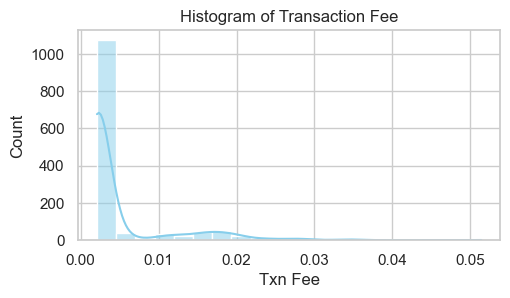

In [286]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Txn Fee'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Transaction Fee')

Text(0.5, 1.0, 'Histogram of Value')

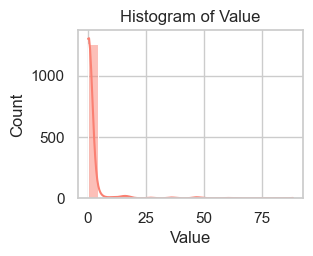

In [287]:
plt.subplot(2, 2, 2)
sns.histplot(df['Value'], bins=20, kde=True, color='salmon')
plt.title('Histogram of Value')

##### Normal Distribution Plot:

- **Representation:** A curve that is symmetric and bell-shaped, representing a normal distribution.

- **Purpose:** Visualize how data is distributed assuming a normal distribution.

- **Key Points:**
  - Bell-shaped curve with a peak at the mean.
  - Symmetric around the mean.
  - Controlled by mean and standard deviation parameters.

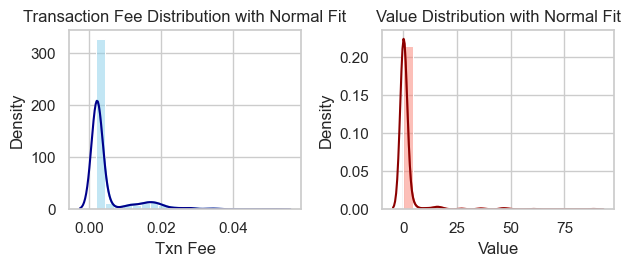

In [288]:
plt.subplot(2, 2, 3)
sns.histplot(df['Txn Fee'], bins=20, kde=True, color='skyblue', stat='density')
sns.kdeplot(df['Txn Fee'], color='darkblue')
plt.title('Transaction Fee Distribution with Normal Fit')

plt.subplot(2, 2, 4)
sns.histplot(df['Value'], bins=20, kde=True, color='salmon', stat='density')
sns.kdeplot(df['Value'], color='darkred')
plt.title('Value Distribution with Normal Fit')

plt.tight_layout()
plt.show()

The values ​​are well fitted to the normal distribution. And they are distributed in a much more concentrated way around the mean. which is consistent with our expectation of human performance.

#### Box Plot (Box-and-Whisker Plot):

- **Representation:** A standardized way of displaying the distribution based on a five-number summary.

- **Purpose:** Provide a summary of central tendency and spread, highlighting potential outliers.

- **Key Points:**
  - Box represents interquartile range (IQR) between Q1 and Q3.
  - Line inside the box is the median, and "whiskers" extend to minimum and maximum values within a certain range.
  - Outliers may be plotted individually.


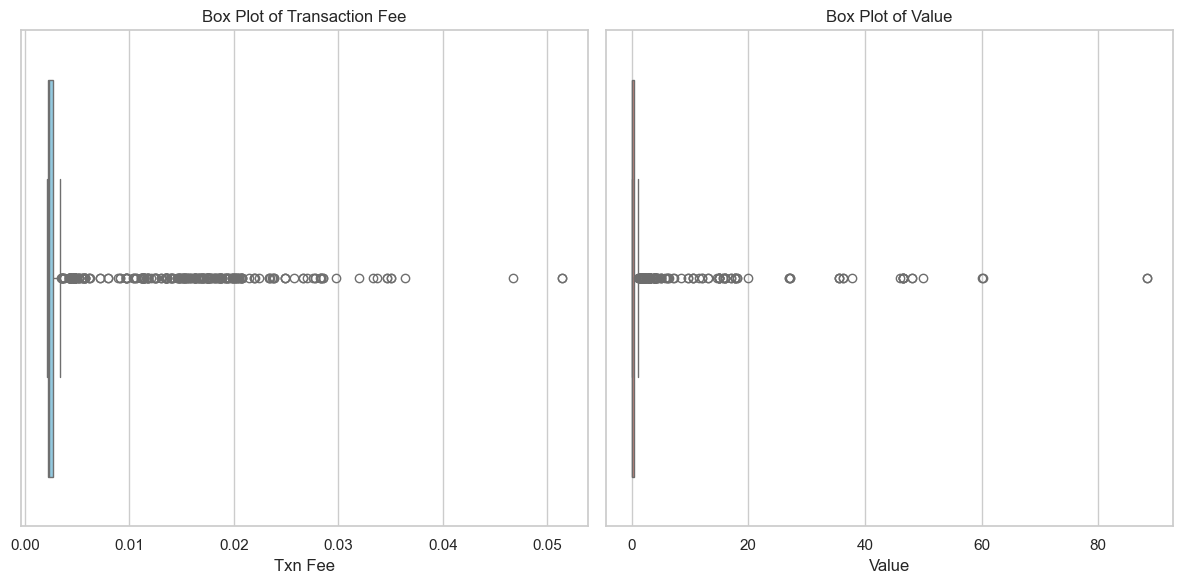

In [289]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Txn Fee'], color='skyblue')
plt.title('Box Plot of Transaction Fee')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Value'], color='salmon')
plt.title('Box Plot of Value')

plt.tight_layout()
plt.show()

#### Violin Plot:

- **Representation:** A combination of a box plot and a kernel density plot.

- **Purpose:** Display the distribution of data across different levels or categories.

- **Key Points:**
  - Width of the plot represents the density of the data at different values.
  - Box plot inside indicates quartiles and median.
  - Useful for visualizing both summary statistics and distribution shape.


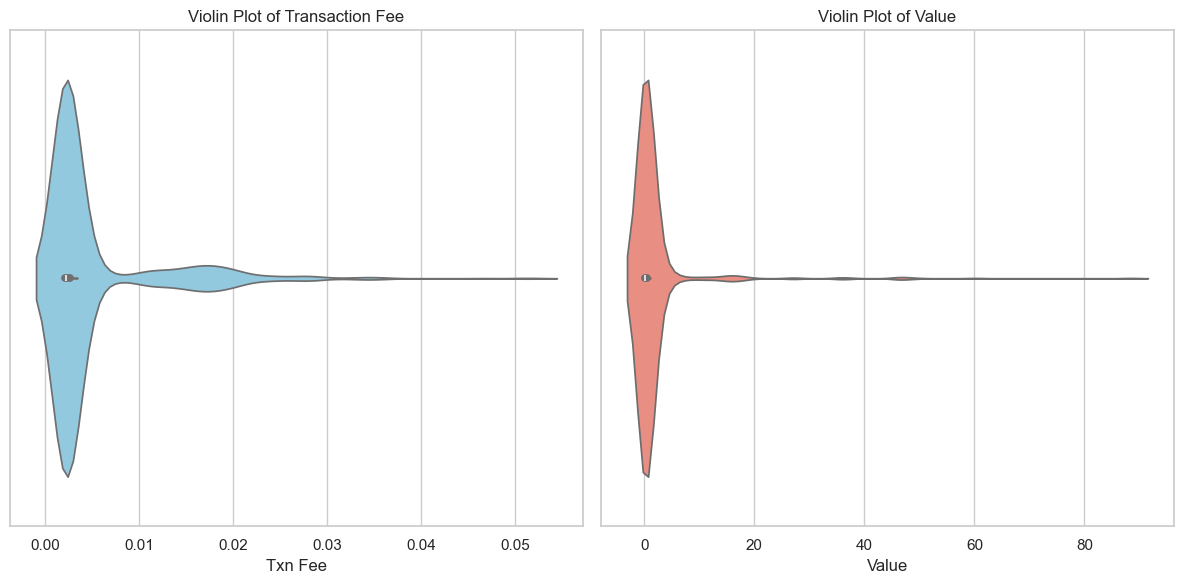

In [290]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x=df['Txn Fee'], color='skyblue')
plt.title('Violin Plot of Transaction Fee')

plt.subplot(1, 2, 2)
sns.violinplot(x=df['Value'], color='salmon')
plt.title('Violin Plot of Value')

plt.tight_layout()
plt.show()

## Data Sampling and Analysis

In [291]:
IRRELEVANT_COLUMNS = {"From", "To"}
TO_NUMERIC_COLUMNS = {"Txn Fee", "Value"}
SRS_SAMPLING_SIZE = 66 #0.05 * total_population

### Load Data

In [292]:
df = pd.read_csv(FILE_PATH)

### Data Cleaning

In [293]:
def get_missing_values(df: pd.DataFrame):
    total_entities = len(df)
    missing_values = df.isna().sum()
    missing_proportion = (missing_values / total_entities) * 100
    return pd.DataFrame({'feature':missing_values.index, 'Count':missing_values.values, 'Percent':missing_proportion.values})

lost_values = get_missing_values(df)
lost_values

,feature,Count,Percent
0,Txn Hash,0,0.0
1,Method,0,0.0
2,Block,0,0.0
3,Age,0,0.0
4,From,0,0.0
5,To,0,0.0
6,Value,0,0.0
7,Txn Fee,0,0.0


there is no missing value in this special case.

In [294]:

def handle_missing_data(_df: pd.DataFrame, loss_values_stats: pd.DataFrame, del_threshold: float = 0.5):
    mean_kind = ['i', 'f']
    mode_kind = ['O']
    df = _df.copy(deep=True)
    for feature, percent in zip(loss_values_stats['feature'], loss_values_stats['Percent']):
        if percent == 0 :
            continue
        elif percent >= del_threshold * 100:
            df.drop(feature, axis=1, inplace=True)
        elif df[feature].dtype.kind in mean_kind:
            df[feature].fillna(df[feature].mean(), inplace=True)
        elif df[feature].dtype.kind in mode_kind:
            df[feature].fillna(df[feature].mode()[0], inplace=True)
    return df

def handel_duplicated_values(df: pd.DataFrame):
    df = df.drop_duplicates()
    return df

def drop_irrelevant_columns(df: pd.DataFrame, irrelevant_columns):
    for c in irrelevant_columns:
        df = df.drop([c], axis=1)
    return df

def replace_with_numeric(df: pd.DataFrame, columns):
    for c in columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')
    for c in columns:
        mean_value = df[c].mean(skipna=True)
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(mean_value)
    return df

def special_data_conversion(df):
    df = df[(df != 0).all(axis=1)]
    df = df[df['From'].astype(str) != df['To'].astype(str)]
    df['Age'] = pd.to_numeric(df['Age'].str.extract('(\d+)')[0], errors='coerce')
    return df

def cleaning_data(df: pd.DataFrame, irrelevant_columns, lost_values, to_numeric_columns):
    fixed = replace_with_numeric(df, to_numeric_columns)
    fixed = handle_missing_data(fixed, lost_values)
    fixed = special_data_conversion(fixed)
    fixed = handel_duplicated_values(fixed)
    fixed = drop_irrelevant_columns(fixed, irrelevant_columns)
    return fixed


In [295]:
df = cleaning_data(df, IRRELEVANT_COLUMNS, lost_values, TO_NUMERIC_COLUMNS)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 0 to 5399
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Txn Hash  1327 non-null   object 
 1   Method    1327 non-null   object 
 2   Block     1327 non-null   int64  
 3   Age       1327 non-null   int64  
 4   Value     1327 non-null   float64
 5   Txn Fee   1327 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 72.6+ KB


## Sampling Methods

#### Simple Random Sampling (SRS):
- **Functionality:** Involves randomly selecting individuals from the population with an equal probability of being chosen. Every individual has an equal chance of being part of the sample.
- **Use Case:** Suitable when the population is homogeneous and no specific characteristics need to be considered in the sampling process.

#### Stratified Sampling:
- **Functionality:** Divides the population into subgroups (strata) based on certain characteristics. Samples are then independently taken from each stratum. This ensures representation from different subgroups.
- **Use Case:** Useful when the population has distinct subgroups with varying characteristics, and you want to ensure each subgroup is adequately represented in the sample.

#### Systematic Sampling:
- **Functionality:** Involves selecting every kth individual from the population after randomly selecting a starting point. The value of k is determined by dividing the population size by the desired sample size.
- **Use Case:** Useful when the population is ordered in some way, and a systematic approach simplifies the sampling process.

#### Cluster Sampling:
- **Functionality:** Divides the population into clusters, randomly selects some clusters, and then includes all individuals within the selected clusters in the sample.
- **Use Case:** Appropriate when the population is naturally divided into clusters, and it is more practical to sample entire clusters rather than individual elements.

#### Convenience Sampling:
- **Functionality:** Involves selecting individuals who are easiest to reach or readily available. This method is often used for its convenience but may introduce bias.
- **Use Case:** Suitable for preliminary research or when access to the entire population is challenging.

#### Quota Sampling:
- **Functionality:** Similar to stratified sampling, but the researcher sets quotas for each stratum based on certain characteristics. Individuals are then conveniently selected to meet these quotas.
- **Use Case:** Useful when specific proportions of the population need to be represented in the sample, but random selection within strata is not feasible.


If your primary goal is to obtain a broad, representative sample of Etherscan transactions ``without a specific focus`` on distinct subgroups or patterns, `Simple Random Sampling` (SRS) might be a suitable choice. \
If there are ``identifiable subgroups`` in the data that you believe are crucial for analysis, and you want to ensure representation from each subgroup, `Stratified Sampling` could be more appropriate.

### SRS

In [296]:
sample_srs = df.sample(SRS_SAMPLING_SIZE, random_state=42)
sample_srs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 4565 to 1243
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Txn Hash  66 non-null     object 
 1   Method    66 non-null     object 
 2   Block     66 non-null     int64  
 3   Age       66 non-null     int64  
 4   Value     66 non-null     float64
 5   Txn Fee   66 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 3.6+ KB


#### SRS Sampling Size:
Determining an appropriate sample size depends on several factors, including the size of the population, the desired level of precision, and the available resources for the study. However, a common rule of thumb is that a sample size of around 5% of the population can often provide reliable results for a wide range of scenarios.

### Stratified Sampling

In [297]:
#continue

### Statistical Analysis

### Visualization

## Questions

### 1. What are some potential limitations when using web scraping for data collection? Specifically, what problems did you face while fetching data from Etherscan? What problems can these limitations cause in your analysis?

### 2. What can make your analysis untrustworthy? What are your solutions?

##### Incomplete Data:
- **Strategy:** Implement error handling in the scraping process to identify and address missed data points.
- **Objective:** Ensure a robust data collection process that captures all relevant information.

##### Data Quality Issues:
- **Strategy:** Perform thorough data cleaning procedures.
- **Approach:**
  - Handle missing values appropriately.
  - Validate the consistency of the data.
- **Objective:** Enhance the overall quality and reliability of the collected data.


### 3. How did the visualization help you in understanding the data? What could you interpret from the plots?

Visualizations provide a clear and intuitive representation of data patterns and distributions.
##### Interpretation of Plots:

##### Histograms:
- **Purpose:** Show the distribution of transaction values.

##### Normal Distribution Plots:
- **Purpose:** Compare the empirical distribution with a theoretical normal distribution.

##### Box Plots and Violin Plots:
- **Purpose:** Identify outliers and visualize data distribution.


### 4. How do the two sampling methods differ in their output? Compare these and explain which one is a better fit to the population.